**Linear Regression Model** Just mean fitting a straight line to your data

You want predict the price of a house based on the size of the house
* 
<img src= "lienar_model.png">

**Lab Model Representation**
* I will learn to implement the model $f_{w,b}$ for linear regression with one variable

 **Notation**
Here is a summary of some of the notation you will encounter.

<img src = "notation.png" style="width:600px;height:200px;">



**Problem Statement**

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2.]
y_train=[300. 500.]


In [3]:
# m is the numer of training examples
print(f"x_train.shape:{x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")


x_train.shape:(2,)
Number of training examples is: 2


**Training example `x_i, y_i`**

In [4]:
i = 1 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]

print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


**Plotting the data**


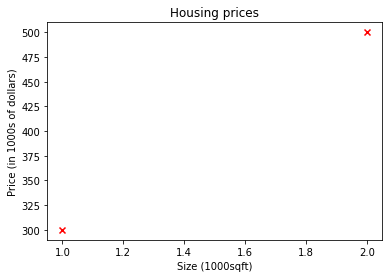

In [5]:
#Plot the data points
plt.scatter(x_train, y_train, marker = 'x', c='r')

# Set the tittle
plt.title("Housing prices")

#Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')

#Set the x-axis label
plt.xlabel('Size (1000sqft)')
plt.show()

**Model function**

<img align="left" src="reg_linear_model.png"     style=" width:380px; padding: 10px; " > The model function for linear regression(which id a function that maps from `x` to `y`) is represented as 
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of w and b give you different straight lines on the plot.

Let's star with $w=100$ and $b = 100$

In [12]:
w = 200
b = 100
print(f"x: {w}")
print(f"b: {b}")

x: 200
b: 100


In [10]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
        x (ndarray (m,)): Data, m examples
        w,b (scalar)    : model parameters
    Returns
        y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

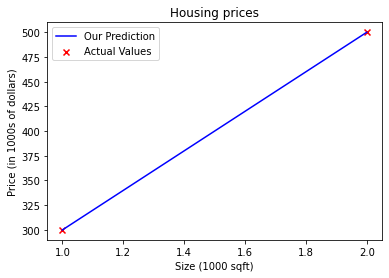

In [13]:
tmp_f_wb = compute_model_output(x_train, w, b)

#plot our model prediction
plt.plot(x_train, tmp_f_wb,c = 'b', label = 'Our Prediction')

#Plot the data points
plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = 'Actual Values')

#Set the title
plt.title("Housing prices")

#Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')

#Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [15]:
x_i = 1.2
cost_1200sqft = w * x_i + b

print(f"{cost_1200sqft: .0f} thousand dollars")

 340 thousand dollars


**Practice exercise**

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [ ]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

In [ ]:
x_train = np.array([1.0, 2.0])      #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])    #(price in 1000s of follars

**Computing Cost**

The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

The code below calculates cost by looping over each example. In each loop:
- 'f_wb', a predicction is calculated.
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [ ]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    Args:
     x (ndarray (m,)): data, m examples
     y (ndarray (m,)): target values
     w,b (scalar)    : model parameters

     Returns 
        total_cost(float): The cost of using w,b as the parameters for linear regression
            to fit the data points in x and y
    """

    # numer of training examples
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = ( 1 / (2 * m)) * cost_sum

    return total_cost
